In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import numpy as np

In [2]:
class location_data:
    def __init__(self):
        self.bounds = [-180, -51, 7, 75]

        #use file path to 2___Plant_Y2022 - Plant.csv 
        north_am_image = ('../data/external/Lorenz_NorthAmerica2022.jpeg')
        
        self.image = Image.open(north_am_image)

    def loc_to_pix_to_brightness(self, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude
        lat = latitude
        long = longitude
        bounds = self.bounds
        image = self.image
        
        width = image.width
        height = image.height   
        x_ratio = ((long - bounds[0]) / (bounds[1] - bounds[0]))
        y_ratio = ((lat - bounds[2]) / (bounds[3] - bounds[2]))
        x = int(x_ratio * width)
        y = int(-y_ratio * height)
    
        #rgb color of the pixels
        get_color = image.getpixel((x, y))
        
        #compares rgb from the pixel to a scale of rgb to determine the brightness of the location in "magnitudes per square arc-second"     
        clr_scale = {21.995 : (0, 0, 0), 21.96 : (35, 35, 35), 21.91 : (70, 70, 70), 21.85 : (2, 37, 132), 21.75 : (0, 62, 220),
        21.60 : (49, 106, 27),
        21.38 : (83, 177, 46),
        21.08 : (144, 140, 46),
        20.70 : (206, 200, 66),
        20.26 : (162, 88, 39),
        19.76 : (216, 118, 53),
        19.23 : (154, 35, 33),
        18.665 : (237, 56, 52),
        18.09 : (191, 191, 191),
        17.75 : (255, 255, 255)}

        clr_keys = list(clr_scale.keys())
        clr_values = list(clr_scale.values())
        possible_clrs = []
        
        for w in range (0, 15):
                possible_clrs.append( ( (get_color[0] - (clr_values[w][0])) ** 2 + ( (get_color[1] - (clr_values[w][1])) ** 2 ) + ( (get_color[2] - (clr_values[w][2])) ** 2 ) )  ** 0.5)
        
        clr_scale_index = possible_clrs.index(min(possible_clrs))
        
        corresponding_rgb_value = clr_values[clr_scale_index]
        corresponding_bright_level = clr_keys[clr_scale_index]
        
    
        if corresponding_rgb_value == (0, 0, 0):
            ratio_single = 1
        else:
            ratio_single = 1
        
        self.calculated_value = ratio_single * corresponding_bright_level
        
        return (self.calculated_value)        

In [3]:
def add_to_dataframe(latitude, longitude):
    #39.6395, -105.3809
    dict_2022 = {"Year": [],"Latitude":[], "Longitude":[], "Brightness":[]}
    load_image = location_data()
    
    for i in range(len(latitude)):
        loc_brightness = (load_image.loc_to_pix_to_brightness(latitude[i],longitude[i]))
        dict_2022["Latitude"].append(latitude[i])
        dict_2022["Longitude"].append(longitude[i])
        dict_2022["Brightness"].append(loc_brightness)      
        dict_2022["Year"].append(2022)
        i += 1

    df_2022 = pd.DataFrame(dict_2022)
    df_2022
    return df_2022

wind_random_coordinates = pd.read_csv("../data/processed/wind_random_coordinates_2022.csv")
wind_df_2022 = add_to_dataframe(wind_random_coordinates['Latitude'], wind_random_coordinates['Longitude'])

coal_random_coordinates = pd.read_csv("../data/processed/coal_random_coordinates_2022.csv")
coal_df_2022 = add_to_dataframe(coal_random_coordinates['Latitude'], coal_random_coordinates['Longitude'])


/opt/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (126316800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/PIL/Image.py:3186: DecompressionBombWarning: Image size (126316800 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


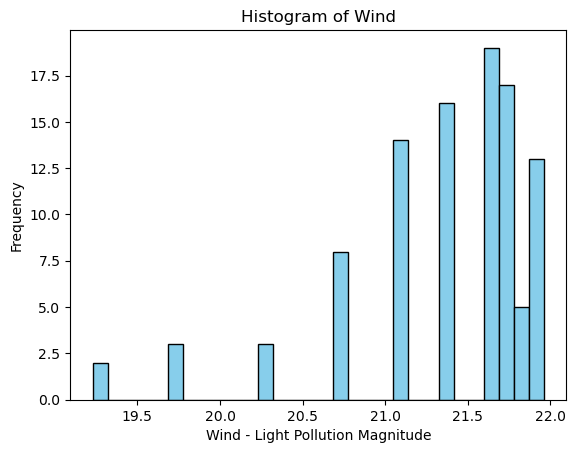

In [4]:
import matplotlib.pyplot as plt

plt.hist(wind_df_2022['Brightness'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Wind')
plt.xlabel('Wind - Light Pollution Magnitude')
plt.ylabel('Frequency')
plt.show()

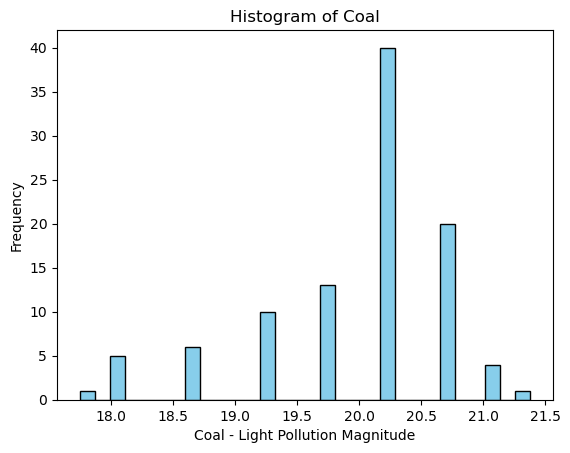

In [5]:
plt.hist(coal_df_2022['Brightness'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Coal')
plt.xlabel('Coal - Light Pollution Magnitude')
plt.ylabel('Frequency')
plt.show()


In [10]:
from scipy.stats import ttest_ind

alpha_level = 0.05
t_stat, p_value = ttest_ind(wind_df_2022['Brightness'], coal_df_2022['Brightness'])
p_value = p_value/2
print("P-value: ", p_value)

if p_value < alpha_level:
    print("We fail to reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis.")


P-value:  1.0201319073709768e-31
We fail to reject the null hypothesis.


In [ ]:
print("Mean Brightness Magnitude for Wind Power Plants: ", wind_df_2022["Brightness"].mean())

In [ ]:
print("Mean Brightness Magnitude for Coal-burning Power Plants: ", coal_df_2022['Brightness'].mean())